<a href="https://colab.research.google.com/github/andreiacampos98/datascience_course/blob/main/data_science_fundamentals/aula7/Exercicios_aula7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

gerente_df=pd.read_excel("./Gerentes.xlsx")
vendas_df=pd.read_excel("./Vendas.xlsx")


1. Relacionar Vendas com Gerentes

Combine as informações das duas planilhas para identificar qual gerente está associado a cada venda. Quantas vendas cada gerente realizou no total?


In [2]:
vendas_gerentes=vendas_df.merge(gerente_df, on='ID Loja')
display(vendas_gerentes)

nb_vendas_gerente=vendas_gerentes.groupby(vendas_gerentes['Gerente']).size().sort_values()
display(nb_vendas_gerente)

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final,Gerente
0,1,2019-01-01,Iguatemi Esplanada,Sapato Estampa,1,358,358,Salvador
1,1,2019-01-01,Iguatemi Esplanada,Camiseta,2,180,360,Salvador
2,1,2019-01-01,Iguatemi Esplanada,Sapato Xadrez,1,368,368,Salvador
3,2,2019-01-02,Norte Shopping,Relógio,3,200,600,Joana
4,2,2019-01-02,Norte Shopping,Chinelo Liso,1,71,71,Joana
...,...,...,...,...,...,...,...,...
93905,65012,2019-11-30,Shopping Vila Velha,Mochila Xadrez,2,283,566,Pablo
93906,65013,2019-11-30,Ribeirão Shopping,Pulseira Listrado,2,79,158,Fábio
93907,65013,2019-11-30,Ribeirão Shopping,Cueca Listrado,3,67,201,Fábio
93908,65014,2019-11-30,Shopping Morumbi,Pulseira Linho,5,114,570,Gisele


Gerente
João        3578
André       3605
Carol       3612
Gisele      3654
Paulo       3698
Letícia     3702
Lilia       3711
Nicole      3711
Andressa    3713
Salvador    3722
Mateus      3728
Joel        3731
Ana         3733
Amanda      3767
Fábio       3771
Helena      3778
Luiza       3793
Fernanda    3808
Diana       3810
Maria       3824
Marcus      3830
Julia       3863
Flavia      3909
Joana       3924
Pablo       3935
dtype: int64

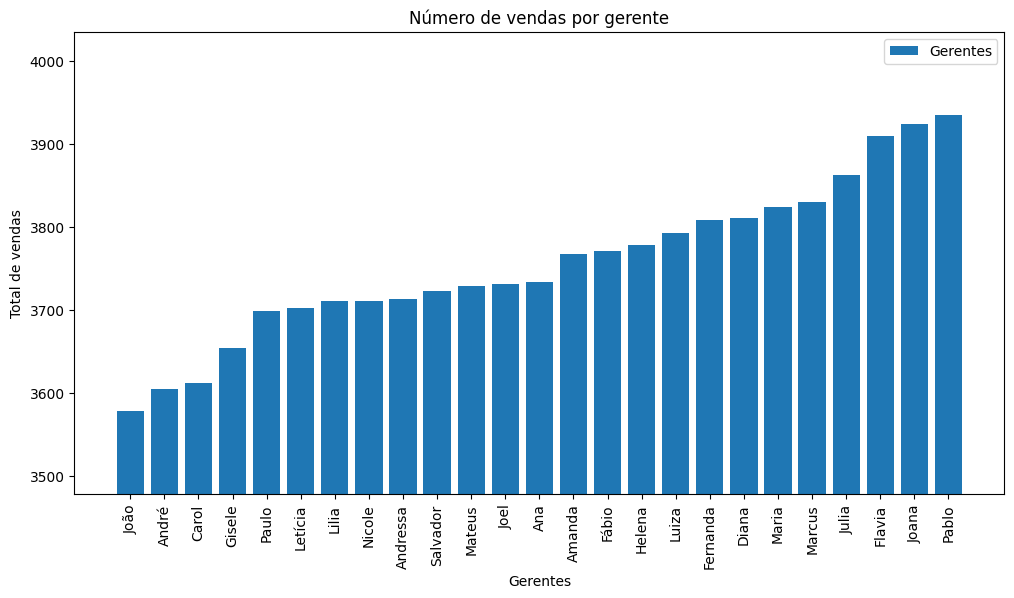

In [3]:
plt.figure(figsize = (12,6))
plt.bar(nb_vendas_gerente.index, nb_vendas_gerente.values, label="Gerentes")
plt.legend()
plt.title("Número de vendas por gerente")
plt.xlabel("Gerentes")
plt.ylabel("Total de vendas")
plt.ylim(nb_vendas_gerente.min() - 100 , nb_vendas_gerente.max() + 100)
plt.xticks(rotation=90)
plt.show()


2. Desempenho por Loja

Qual foi o total de vendas (em valor final) realizado por cada loja? Apresente as lojas em ordem decrescente de faturamento.


In [4]:
total_vendas_loja=vendas_gerentes.groupby(vendas_gerentes['ID Loja'])['Valor Final'].sum().sort_values(ascending=False)
display(total_vendas_loja)

ID Loja
Shopping Vila Velha                 1615271
Iguatemi Campinas                   1612460
Shopping SP Market                  1610930
Norte Shopping                      1610477
Palladium Shopping Curitiba         1600499
Bourbon Shopping SP                 1600260
Shopping Center Leste Aricanduva    1596714
Iguatemi Esplanada                  1596339
Ribeirão Shopping                   1594186
Rio Mar Recife                      1582897
Novo Shopping Ribeirão Preto        1578522
Rio Mar Shopping Fortaleza          1570540
Shopping Iguatemi Fortaleza         1550642
Shopping Barra                      1549955
Shopping União de Osasco            1547738
Center Shopping Uberlândia          1543961
Passei das Águas Shopping           1536925
Shopping Center Interlagos          1536665
Shopping Ibirapuera                 1527153
Shopping Eldorado                   1523772
Salvador Shopping                   1517583
Parque Dom Pedro Shopping           1509575
Shopping Recife         

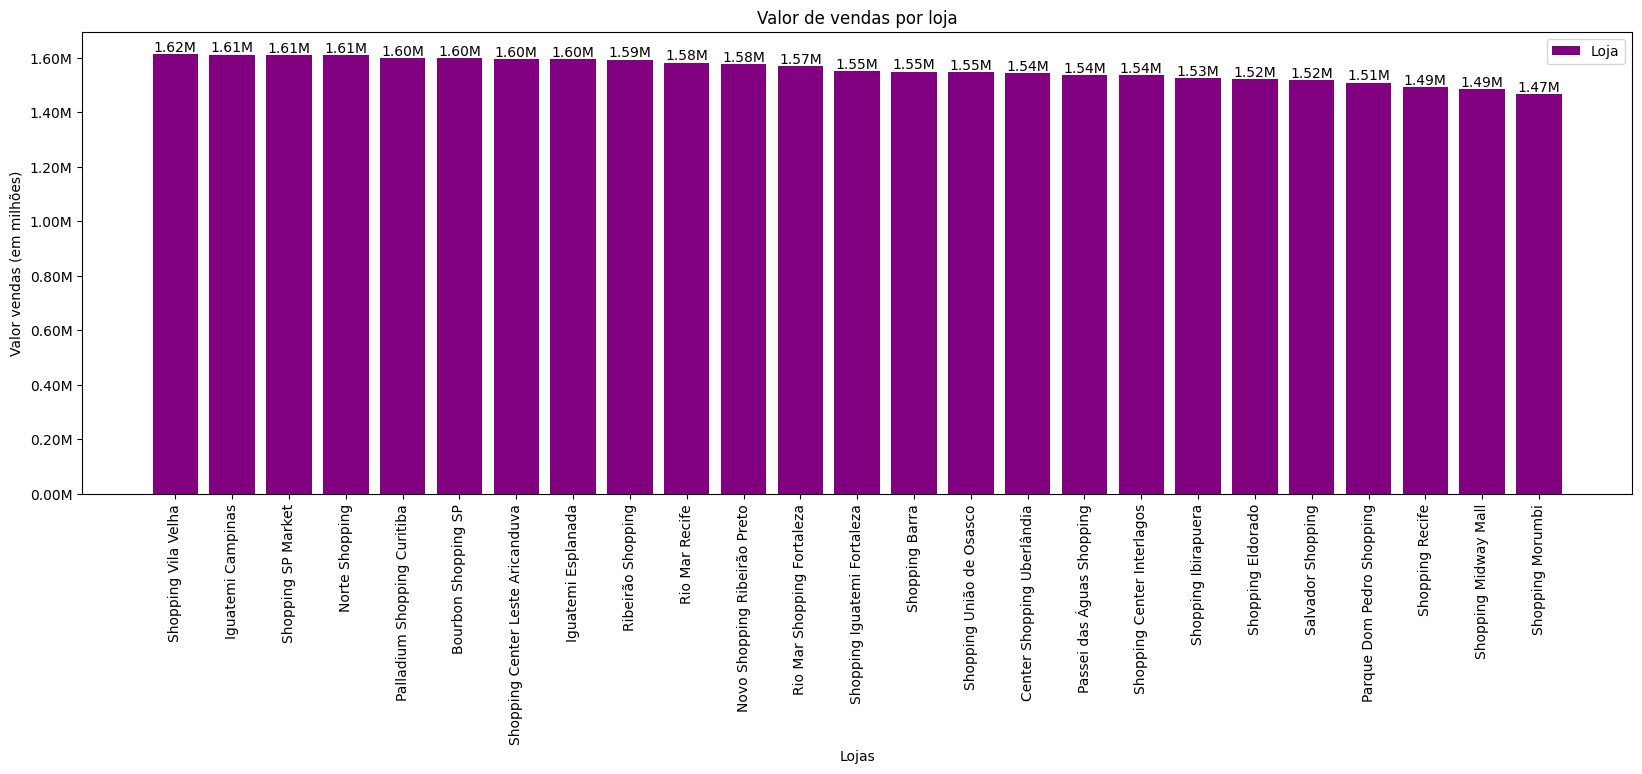

In [9]:
import matplotlib.ticker as ticker
import mplcursors

# Criar o gráfico de barras
plt.figure(figsize=(20, 6))
bars=plt.bar(total_vendas_loja.index, total_vendas_loja.values, color='purple', label='Loja')

# Configurações do gráfico
plt.title("Valor de vendas por loja")
plt.legend()
plt.xlabel("Lojas")
plt.ylabel("Valor vendas (em milhões)")
plt.xticks(rotation=90)

# Formatar o eixo Y para mostrar valores em milhões
formatter = ticker.FuncFormatter(lambda x, _: f'{x/1e6:.2f}M')
plt.gca().yaxis.set_major_formatter(formatter)

for i, value in enumerate(total_vendas_loja.values):
    plt.text(i, value + 10000, f"{value/1e6:.2f}M", ha="center", fontsize=10, color="black")

cursor = mplcursors.cursor(bars, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"R${sel.target[1]:,.2f}"))

# Exibir o gráfico
plt.show()

3. Produto Mais Vendido

Qual produto foi o mais vendido (em quantidade) em todo o período? Liste também o produto com o maior faturamento.


4. Venda Média por Loja

Calcule a média do valor final das vendas para cada loja. Qual loja teve a maior média?


5. Análise Temporal

Analise o desempenho de vendas ao longo do tempo (ex.: por mês ou trimestre). Algum padrão ou tendência sazonal foi identificado?
